In [1]:
import geopandas as gpd

In [2]:
df = gpd.read_parquet("example_data/nyc_bike_trips.parquet")
df

,h3,morning_starts,morning_ends,afternoon_starts,afternoon_ends,geometry
0,617733120577503231,58,15,24,38,"POLYGON ((-73.88768 40.876, -73.88979 40.87506..."
1,617733120577765375,18,5,32,50,"POLYGON ((-73.88543 40.87341, -73.88755 40.872..."
2,617733120578027519,8,26,24,21,"POLYGON ((-73.89196 40.87589, -73.89407 40.874..."
3,617733120578289663,129,61,103,108,"POLYGON ((-73.88972 40.8733, -73.89183 40.8723..."
4,617733120578551807,50,14,72,80,"POLYGON ((-73.88563 40.8787, -73.88774 40.8777..."
...,...,...,...,...,...,...
1496,617733152329433087,86,88,73,59,"POLYGON ((-74.00425 40.67719, -74.00635 40.676..."
1497,617733152329695231,70,94,147,88,"POLYGON ((-74.00201 40.67461, -74.00411 40.673..."
1498,617733152329957375,51,49,38,45,"POLYGON ((-74.00852 40.67707, -74.01062 40.676..."
1499,617733152333627391,144,132,206,197,"POLYGON ((-74.01503 40.67954, -74.01713 40.678..."


/var/folders/48/bnhhxw916t79kzvrcmr9ghcc0000gn/T/ipykernel_88173/4196805281.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


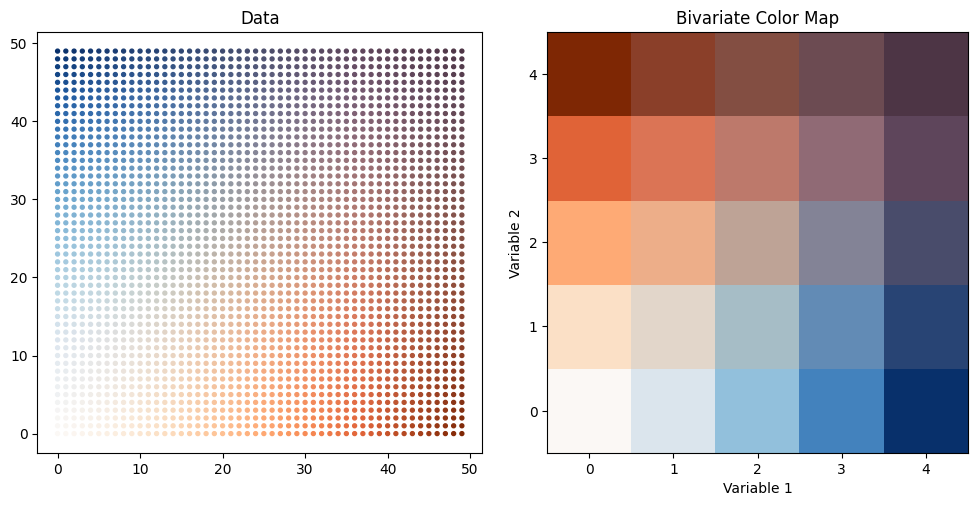

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from bivario.cmap import cmap_from_bivariate_data

xx, yy = np.mgrid[0:50, 0:50]
# xx, yy = np.mgrid[0:5, 0:5]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
x = xx.flatten()
y = yy.flatten()
cflat = C_map.reshape((len(x), 3))
plt.scatter(x, y, c=cflat, s=8)

ax1.set_title("Data")

# xx, yy = np.mgrid[0:16, 0:16]
# xx, yy = np.mgrid[0:5, 0:5]
xx, yy = np.mgrid[0:5, 0:5]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(C_map)
ax2.set_title("Bivariate Color Map")
ax2.set_xlabel("Variable 1")
ax2.set_ylabel("Variable 2")
ax2.set_ylim((-0.5, 0.5 + (yy.max() - yy.min())))

fig.tight_layout()
fig.show()

In [49]:
from mapclassify import classify

binning_start = classify(df["morning_starts"], scheme="NaturalBreaks", k=7)
binning_end = classify(df["morning_ends"], scheme="NaturalBreaks", k=7)
binning_end

NaturalBreaks

     Interval        Count
--------------------------
[   0.00,  153.00] |   931
( 153.00,  404.00] |   251
( 404.00,  729.00] |   125
( 729.00, 1166.00] |    84
(1166.00, 1758.00] |    57
(1758.00, 2554.00] |    31
(2554.00, 3689.00] |    22

In [50]:
binning_start.bins

array([  168.,   454.,   832.,  1279.,  1875.,  2769.,  4740.])

In [51]:
C_map = cmap_from_bivariate_data(binning_start.yb, binning_end.yb, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)
C_map

array([[ 0.98454735,  0.97269901,  0.96095145],
       [ 0.98454735,  0.97269901,  0.96095145],
       [ 0.98454735,  0.97269901,  0.96095145],
       ..., 
       [ 0.98454735,  0.97269901,  0.96095145],
       [ 0.98454735,  0.97269901,  0.96095145],
       [ 0.98454735,  0.97269901,  0.96095145]])

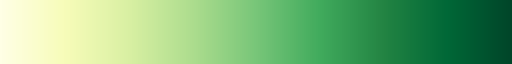

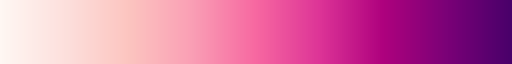

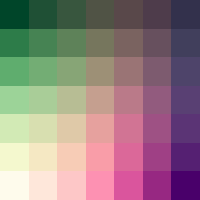

In [52]:
import base64
from PIL import Image
from folium.plugins import FloatImage
from matplotlib.colors import rgb2hex

cmap1 = plt.cm.YlGn
# cmap1 = plt.cm.Grays
# cmap2 = plt.cm.Blues

# cmap1 = plt.cm.rainbow
cmap2 = plt.cm.RdPu

default_grid_size = 5
# current_grid_size = 128
current_grid_size = 7
xx, yy = np.mgrid[0:current_grid_size, 0:current_grid_size]
legend_cmap = cmap_from_bivariate_data(xx, yy, cmap1=cmap1, cmap2=cmap2)

# legend_cmap

img = Image.fromarray(np.uint8((legend_cmap)[:, :, :3] * 255))
# img.resize(size=(200, 200), resample=0)
display(cmap1)
display(cmap2)
display(img.transpose(1).resize(size=(200, 200), resample=0))

Initial data area size: 131.1×131.1px
[ 2.  2.]
[ 3.05149396  3.05149396]
Bbox(x0=0.26958333333333334, y0=0.2483333333333333, x1=0.925, y1=0.90375)
TransformedBbox(
    Bbox(x0=0.26958333333333334, y0=0.2483333333333333, x1=0.925, y1=0.90375),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=3.05149396058487, y1=3.05149396058487),
            Affine2D().scale(100.0))))
82.2631913541 75.7787666879 200.0 200.0
Changed data area size: 200.0×200.0px
-32.2631913541 -4.22123331214


/var/folders/48/bnhhxw916t79kzvrcmr9ghcc0000gn/T/ipykernel_88173/3507736743.py:111: UserWarning: The figure layout has changed to tight
  fig.tight_layout()



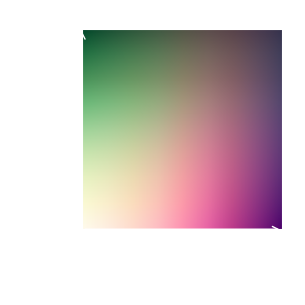

In [55]:
from itertools import product

from shapely import box

default_grid_size = 9
current_grid_size = 128
# current_grid_size = 7
xx, yy = np.mgrid[0:current_grid_size, 0:current_grid_size]

squares = []
for _i, _j in product(range(default_grid_size), range(default_grid_size)):
    squares.append(dict(geometry=box(_i, _j, _i + 1, _j + 1), x=xx[_j, _i], y=yy[_j, _i]))

squares_gdf = gpd.GeoDataFrame(squares, crs=4326)

legend_cmap = cmap_from_bivariate_data(
    xx, yy, cmap1=plt.cm.YlGn, cmap2=plt.cm.RdPu, corner_colour=[255, 0, 0]
)

img = Image.fromarray(np.uint8((legend_cmap)[:, :, :3] * 255))

# img = img.transpose(Image.FLIP_TOP_BOTTOM)  # .resize((100, 100), resample=0)

cmap = cmap_from_bivariate_data(
    squares_gdf["x"],
    squares_gdf["y"],
    cmap1=plt.cm.YlGn,
    cmap2=plt.cm.RdPu,
    corner_colour=[255, 0, 0],
)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(squares_gdf.index, hex_values))

IMAGE_SIZE_PX = 200
DPI = 100

TICK_FONTSIZE_PX = 10
TICK_FONTSIZE_PT = TICK_FONTSIZE_PX * 72 / DPI

IMG_SIZE_IN = IMAGE_SIZE_PX / DPI


def figure_to_base64_string(plt_fig):
    import io

    buffered = io.BytesIO()
    # img.save(buffered, format="PNG")
    # plt_fig.tight_layout()
    plt_fig.savefig(buffered, transparent=True, dpi=DPI)
    # plt_fig.savefig(buffered, dpi=DPI)
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


color = "white"

with plt.rc_context(
    {
        "axes.labelcolor": color,
        "axes.edgecolor": color,
        "xtick.color": color,
        "ytick.color": color,
    }
):
    fig, ax = plt.subplots(figsize=(IMG_SIZE_IN, IMG_SIZE_IN), dpi=DPI, constrained_layout=True)
    ax.imshow(img, origin="lower")
    ax.tick_params(axis="both", which="both", length=0)
    # ax.axis("off")

    # fig.tight_layout()

    ax.annotate(
        "",
        xy=(0, 1),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )
    ax.annotate(
        "",
        xy=(1, 0),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )

    ax.set_ylabel("Column B", fontsize=TICK_FONTSIZE_PT)
    ax.set_xlabel("Column A", fontsize=TICK_FONTSIZE_PT)
    ax.tick_params(labelsize=TICK_FONTSIZE_PT)

    # labels = [0, *binning_start.bins]

    # # numerical
    # xticks = np.linspace(-0.5, legend_cmap.shape[0] + 0.5, len(labels))
    # # xticks = np.arange(-0.5, cmap.shape[1], 1)
    # # categorical
    # # xticks = np.arange(0, cmap.shape[1], 1)
    # ax.set_xticks(xticks)

    # ax.set_xticklabels(labels[:len(xticks)], ha="right")
    # ax.set_xticklabels(labels)

    fig.tight_layout()

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Initial data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    # Calculate scale factor so data area = target_data_px
    scale = IMAGE_SIZE_PX / min(data_width_px, data_height_px)

    print(fig.get_size_inches())

    # Compute new figure size (inches)
    w_in, h_in = fig.get_size_inches()
    new_w_in = w_in * scale
    new_h_in = h_in * scale

    fig.set_size_inches(new_w_in, new_h_in)

    print(fig.get_size_inches())

    # Redraw with new size
    fig.canvas.draw()

    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()
    print(bbox_data)  # Normalized position in figure
    print(bbox_ax)
    x0, y0, w, h = bbox_ax.bounds
    print(x0, y0, w, h)  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Changed data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    data_url = "data:image/png;base64," + figure_to_base64_string(fig)

    plt.close()


# fig.savefig('temp.png', transparent=True)

m = squares_gdf.reset_index().explore(
    # "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
    "index",
    cmap=lambda x: color_dict[x],
    legend=False,
    tiles="CartoDB DarkMatter",
    style_kwds=dict(fillOpacity=1.0),
)

# print(data_url)

legend_position_x = 50
legend_position_y = 80

new_fig_size_px = new_w_in * DPI
translateX = legend_position_x - x0
translateY = -(new_fig_size_px - y0 - 200)
translateY = +y0 - legend_position_y
print(translateX, translateY)

FloatImage(
    data_url,
    bottom=0,
    left=0,
    width=f"{new_fig_size_px}px",
    transform=f"translate({translateX}px, {translateY}px)",
).add_to(m)

# plt.close()
# plt.show()
m

In [57]:
binning_start.bins[-2]

2769.0

Initial data area size: 177.1×177.1px
[ 2.5  2.5]
[ 3.52816653  3.52816653]
Bbox(x0=0.16466666666666668, y0=0.20654166666666662, x1=0.8732500000000001, y1=0.915125)
TransformedBbox(
    Bbox(x0=0.16466666666666668, y0=0.20654166666666662, x1=0.8732500000000001, y1=0.915125),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=3.5281665294601905, y1=3.5281665294601905),
            Affine2D().scale(100.0))))
58.0971421851 72.8713395272 250.0 250.0
Changed data area size: 250.0×250.0px
-8.09714218511 -7.12866047277


/var/folders/48/bnhhxw916t79kzvrcmr9ghcc0000gn/T/ipykernel_88173/3401230090.py:130: UserWarning: The figure layout has changed to tight
  fig.tight_layout()



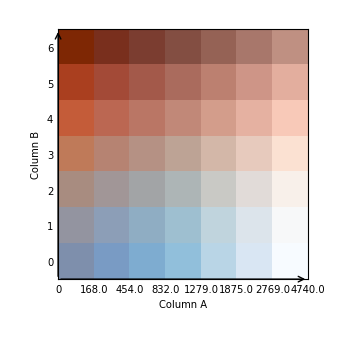

In [ ]:
import base64
from PIL import Image
from folium.plugins import FloatImage
from matplotlib.colors import rgb2hex

cmap1 = plt.cm.Oranges_r
# cmap2 = plt.cm.Blues

# cmap1 = plt.cm.rainbow
cmap2 = plt.cm.Blues_r
# cmap2 = plt.cm.YlGn

cmap = cmap_from_bivariate_data(
    binning_start.yb, binning_end.yb, cmap1=cmap1, cmap2=cmap2
    # binning_start.yb, binning_end.yb, cmap1=cmap1, cmap2=cmap2, corner_colour=[3, 44, 252]
)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(df.index, hex_values))
alpha_dict = dict(
    zip(
        df.index,
        np.sqrt(
            np.minimum(
                1,
                np.maximum(
                    # df["morning_starts"] / df["morning_starts"].quantile(0.9),
                    df["morning_starts"] / binning_start.bins[-2],
                    # df["morning_ends"] / df["morning_ends"].quantile(0.9),
                    df["morning_ends"] / binning_end.bins[-2],
                ),
            )
        ),
    )
)

default_grid_size = 5
current_grid_size = 7
# current_grid_size = 5
xx, yy = np.mgrid[0:current_grid_size, 0:current_grid_size]
# legend_cmap = cmap_from_bivariate_data(xx, yy, cmap1=cmap1, cmap2=cmap2, corner_colour=[3, 44, 252])
legend_cmap = cmap_from_bivariate_data(xx, yy, cmap1=cmap1, cmap2=cmap2)

img = Image.fromarray(np.uint8((legend_cmap)[:, :, :3] * 255))

# img = img.transpose(Image.FLIP_TOP_BOTTOM)  # .resize((100, 100), resample=0)

# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}

IMAGE_SIZE_PX = 250
DPI = 100

TICK_FONTSIZE_PX = 10
TICK_FONTSIZE_PT = TICK_FONTSIZE_PX * 72 / DPI

IMG_SIZE_IN = IMAGE_SIZE_PX / DPI


def figure_to_base64_string(plt_fig):
    import io

    buffered = io.BytesIO()
    # img.save(buffered, format="PNG")
    # plt_fig.tight_layout()
    plt_fig.savefig(buffered, transparent=True, dpi=DPI)
    # plt_fig.savefig(buffered, dpi=DPI)
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


# color = "white"
color = "black"

with plt.rc_context(
    {
        "axes.labelcolor": color,
        "axes.edgecolor": color,
        "xtick.color": color,
        "ytick.color": color,
    }
):
    fig, ax = plt.subplots(figsize=(IMG_SIZE_IN, IMG_SIZE_IN), dpi=DPI, constrained_layout=True)
    ax.imshow(img, origin="lower")
    ax.tick_params(axis="both", which="both", length=0)
    # ax.axis("off")

    # fig.tight_layout()

    ax.annotate(
        "",
        xy=(0, 1),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )
    ax.annotate(
        "",
        xy=(1, 0),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )

    ax.set_ylabel("Column B", fontsize=TICK_FONTSIZE_PT)
    ax.set_xlabel("Column A", fontsize=TICK_FONTSIZE_PT)
    ax.tick_params(labelsize=TICK_FONTSIZE_PT)

    labels = [0, *binning_start.bins]

    # numerical
    xticks = np.linspace(-0.5, legend_cmap.shape[1] - 0.5, len(labels))
    # xticks = np.arange(-0.5, cmap.shape[1], 1)
    # categorical
    # xticks = np.arange(0, cmap.shape[1], 1)
    ax.set_xticks(xticks)

    # ax.set_xticklabels(labels[:len(xticks)], ha="right")
    ax.set_xticklabels(labels)

    fig.tight_layout()

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Initial data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    # Calculate scale factor so data area = target_data_px
    scale = IMAGE_SIZE_PX / min(data_width_px, data_height_px)

    print(fig.get_size_inches())

    # Compute new figure size (inches)
    w_in, h_in = fig.get_size_inches()
    new_w_in = w_in * scale
    new_h_in = h_in * scale

    fig.set_size_inches(new_w_in, new_h_in)

    print(fig.get_size_inches())

    # Redraw with new size
    fig.canvas.draw()

    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()
    print(bbox_data)  # Normalized position in figure
    print(bbox_ax)
    x0, y0, w, h = bbox_ax.bounds
    print(x0, y0, w, h)  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Changed data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    data_url = "data:image/png;base64," + figure_to_base64_string(fig)

    plt.close()


# fig.savefig('temp.png', transparent=True)

m = df.reset_index().explore(
    # "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
    "index",
    cmap=lambda x: color_dict[x],
    legend=False,
    # tiles="CartoDB DarkMatter",
    tiles="CartoDB Voyager",
    # alpha=""
    # style_kwds=dict(fillOpacity=0.8),
    style_kwds=dict(
        style_function=lambda x: dict(
            # opacity=alpha_dict[x["properties"]["index"]],
            opacity=0,
            fillOpacity=alpha_dict[x["properties"]["index"]],
        )
    ),
)

# print(data_url)

legend_position_x = 50
legend_position_y = 80

new_fig_size_px = new_w_in * DPI
translateX = legend_position_x - x0
translateY = -(new_fig_size_px - y0 - 200)
translateY = +y0 - legend_position_y
print(translateX, translateY)

FloatImage(
    data_url,
    bottom=0,
    left=0,
    width=f"{new_fig_size_px}px",
    transform=f"translate({translateX}px, {translateY}px)",
).add_to(m)

# plt.close()
# plt.show()
m

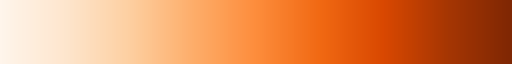

In [61]:
cmap1

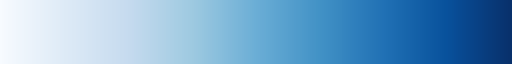

In [62]:
cmap2

In [ ]:
m.save("third_version.html")

[[[0.        ]]

 [[0.16666667]]

 [[0.33333333]]

 [[0.5       ]]

 [[0.66666667]]

 [[0.83333333]]

 [[1.        ]]]
[[[1.         0.96078431 0.92156863 1.        ]]

 [[0.99483276 0.87455594 0.75303345 1.        ]]

 [[0.99215686 0.72679739 0.49150327 1.        ]]

 [[0.99141869 0.55072664 0.23277201 1.        ]]

 [[0.91372549 0.36862745 0.05098039 1.        ]]

 [[0.7145098  0.23418685 0.00927336 1.        ]]

 [[0.49803922 0.15294118 0.01568627 1.        ]]]


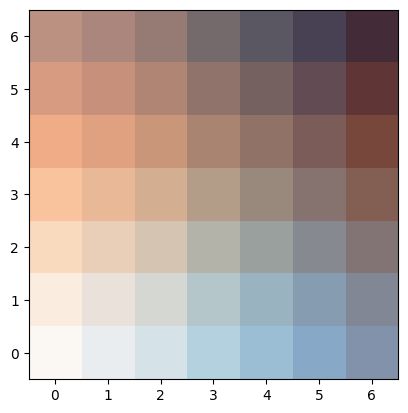

In [34]:
import numpy as np


def bilinear(l=256, c0=[1, 0.5, 0], c1=[0, 0.5, 1]):
    """
    Returns an l by l colormap that interpolates linearly between 4 colors;
    black, c0, c1 and c0+c1.

    Args:
        l: size of the colormap, defaults to 256
        c0: [r,g,b] array-like defining the color at the top left corner, defaults to [1,0.5,0] (orange)
        c1: [r,g,b] array-like defining the color at the bottom right corner, defaults to [0,0.5,1]] (light blue)
    returns:
        a (l,l,3) numpy array of rgb values
    """
    rgb = np.zeros((l, l, 3))
    rgb[:, :, :] = (
        np.linspace(0, 1, l)[:, np.newaxis, np.newaxis] * np.array(c0)[np.newaxis, np.newaxis, :]
    )
    rgb[:, :, :] += (
        np.linspace(0, 1, l)[np.newaxis, :, np.newaxis] * np.array(c1)[np.newaxis, np.newaxis, :]
    )
    rgb[rgb < 0] = 0
    rgb[rgb > 1] = 1
    return rgb

def bilinear_cmap(l=256, c0=plt.cm.Oranges, c1=plt.cm.Blues):
    """
    Returns an l by l colormap that interpolates linearly between 4 colors;
    black, c0, c1 and c0+c1.

    Args:
        l: size of the colormap, defaults to 256
        c0: [r,g,b] array-like defining the color at the top left corner, defaults to [1,0.5,0] (orange)
        c1: [r,g,b] array-like defining the color at the bottom right corner, defaults to [0,0.5,1]] (light blue)
    returns:
        a (l,l,3) numpy array of rgb values
    """
    rgb = np.zeros((l, l, 4))
    print(np.linspace(0, 1, l)[:, np.newaxis, np.newaxis])
    print(c0)
    print(c0(np.linspace(0, 1, l)[:, np.newaxis]))
    rgb[:, :, :] = (
        c0(np.linspace(0, 1, l)[:, np.newaxis]) / 2
    )
    rgb[:, :, :] += (
        c1(np.linspace(0, 1, l)[np.newaxis, :]) / 2
    )
    rgb[rgb < 0] = 0
    rgb[rgb > 1] = 1
    return rgb


# bcm = bilinear(7, c0=[0, 1, 0], c1=[0, 0, 1])
# bcm = bilinear(7, c0=[1, 0.5, 0], c1=[0, 0.5, 1])
bcm = bilinear_cmap(7)

import matplotlib.pyplot as plt

plt.imshow(bcm, origin="lower")

In [32]:
bcm

array([[[1.96862745, 1.94509804, 1.92156863, 2.        ],
        [1.84069204, 1.86242215, 1.88023068, 2.        ],
        [1.67189542, 1.7751634 , 1.82222222, 2.        ],
        [1.41708574, 1.64141484, 1.75980008, 2.        ],
        [1.21568627, 1.49019608, 1.67581699, 2.        ],
        [1.06251442, 1.31829296, 1.5644752 , 2.        ],
        [1.03137255, 1.14901961, 1.34117647, 2.        ]],

       [[1.96346021, 1.85886967, 1.75303345, 2.        ],
        [1.8355248 , 1.77619377, 1.7116955 , 2.        ],
        [1.66672818, 1.68893502, 1.65368704, 2.        ],
        [1.41191849, 1.55518647, 1.5912649 , 2.        ],
        [1.21051903, 1.4039677 , 1.50728181, 2.        ],
        [1.05734717, 1.23206459, 1.39594002, 2.        ],
        [1.02620531, 1.06279123, 1.17264129, 2.        ]],

       [[1.96078431, 1.71111111, 1.49150327, 2.        ],
        [1.8328489 , 1.62843522, 1.45016532, 2.        ],
        [1.66405229, 1.54117647, 1.39215686, 2.        ],
        [1

In [197]:
alpha_dict

{0: np.float64(0.14472798609900736),
 1: np.float64(0.0806259369670165),
 2: np.float64(0.10089652933550233),
 3: np.float64(0.21584071812635378),
 4: np.float64(0.13437656161169417),
 5: np.float64(0.07601486235852868),
 6: np.float64(0.2027608966392471),
 7: np.float64(0.07360107399470765),
 8: np.float64(0.09690031662230185),
 9: np.float64(0.13028291020677482),
 10: np.float64(0.05701114676889651),
 11: np.float64(0.10655861141365178),
 12: np.float64(0.03291540093383166),
 13: np.float64(0.10408763704854128),
 14: np.float64(0.11080975142646687),
 15: np.float64(0.18350114528543138),
 16: np.float64(0.03800743117926434),
 17: np.float64(0.08395098693127159),
 18: np.float64(0.055967324620847726),
 19: np.float64(0.17417193034980355),
 20: np.float64(0.18135485922566608),
 21: np.float64(0.16317138877367704),
 22: np.float64(0.07663641544513143),
 23: np.float64(0.09113861828482732),
 24: np.float64(0.1028185406923372),
 25: np.float64(0.1928640827744561),
 26: np.float64(0.0523526

In [59]:
m.save("bivariate_legend_map.html")

In [9]:
from matplotlib.colors import rgb2hex


cmap = cmap_from_bivariate_data(
    binning_start.yb,
    binning_end.yb,
    cmap1=plt.cm.Oranges,
    cmap2=plt.cm.Blues,
)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(df.index, hex_values))

m = df.reset_index().explore(
    "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
)
m